In [40]:
import numpy as np
import keras
from keras import backend as TF
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [42]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(244,244),classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(244,244),classes=['dog','cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(244,244),classes=['dog','cat'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [43]:
# plots images with Labels within jupyter notebook
def plots(ims,figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [44]:
imgs, labels = next(train_batches)

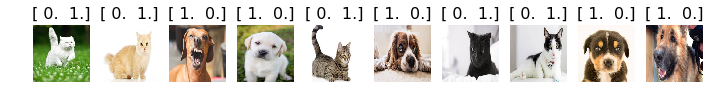

In [45]:
plots(imgs, titles=labels)

# Build and train CNN

In [46]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(244,244,3)),#most likely that will need adjustment as BW TF
    Flatten(),
    Dense(2, activation='softmax'), #output for either cat or dog. for our case, will need bigger node
])

In [47]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit_generator(train_batches, steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 6s - loss: 8.8912 - acc: 0.4250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 2s - loss: 8.8650 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 2s - loss: 7.2531 - acc: 0.5500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
